In [16]:
import cv2
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import matplotlib.pyplot as plt


import tensorflow as tf
import tensorflow.keras.datasets.cifar10
import keras

from sklearn.datasets import fetch_openml 
from skimage.filters import threshold_otsu


from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import accuracy_score # başarım ölçütü
from sklearn.metrics import f1_score # başarım ölçütü

from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay 

import numpy as np
import os

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [18]:
x_data = np.concatenate((x_train , x_test) , axis=0)
y_data = np.concatenate((y_train , y_test) , axis=0)

In [19]:
data_x = []

In [20]:
for i in range(60000):
    data = cv2.cvtColor(x_data[i] , cv2.COLOR_BGR2GRAY)
    data = cv2.resize(data , (50,50))
    data_x.append(data)

In [21]:
X_clean = []
for image in data_x :
    threshold_value = threshold_otsu(image)
    binary_image = image > threshold_value
    X_clean.append(binary_image.flatten())

In [22]:
data_y = pd.DataFrame(y_data)
data_y[0].shape

(60000,)

In [23]:
x_train , x_test , y_train , y_test = train_test_split(X_clean , data_y[0] , test_size=0.2 , random_state=42)

In [24]:
model = RandomForestClassifier()

# model eğitimi
model.fit(x_train , y_train)

# test veri kümesi üzerinden tahmin yapılması

y_pred = model.predict(x_test)

In [25]:
y_pred

array([0, 3, 9, ..., 1, 0, 9], dtype=uint8)

In [26]:
accuracy = accuracy_score(y_test , y_pred)
print("accuracy: " , accuracy)

accuracy:  0.3814166666666667


In [27]:
f1_score = f1_score(y_test , y_pred , average="weighted")
print("f1 score: " , f1_score)

f1 score:  0.37814993018418014


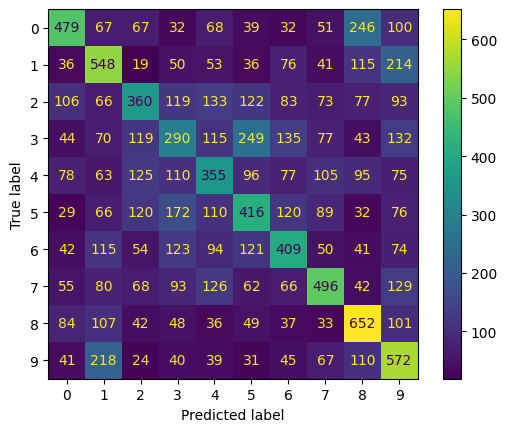

In [28]:
cm = confusion_matrix(y_test , y_pred , labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=model.classes_)
disp.plot()